<h1><center>ALURA CASH</center></h1>

**Importando base de dados**

In [1]:
import pandas as pd

dados = pd.read_csv('data/analise_de_risco.csv', sep=';')

dados.head()

,id_pessoa,idade_pessoa,salario_ano_pessoa,propriedade_pessoa,anos_trabalhados_pessoa,id_emprestimo,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros_emprestimo,status_inadimplencia,percentual_emprestimo_salario,id_historico,verifica_inadimplencia,tempo_primeira_solicitacao
0,F9a6bBd9-Xe2o,27,68000,Aluguel,4.0,8HuvzhAq-k7Xi,Melhora_do_lar,A,8700,7.88,0,0.13,L42AQtMx-SEGR,N,5
1,RSQpYv0W-D6Oo,24,12600,Aluguel,2.0,PDpdl2hQ-Sszr,Empreendimento,C,2500,13.11,1,0.20,oZ2iPvfD-HdIo,Y,2
2,bRYeof0L-cqHI,30,100000,Aluguel,13.0,0T2YFLWb-IZze,Pagamento_debitos,A,12000,7.88,0,0.12,0Y1a64ag-4RLW,N,9
3,d0YRlkdZ-nuLT,28,83000,Hipoteca,6.0,xzTEiD3e-BbFZ,Pagamento_debitos,B,5000,0.00,0,0.06,Z5LA433k-5vqf,N,9
4,njGBnugm-85Dv,30,110400,Aluguel,1.0,QKDlpIm7-sqMC,Empreendimento,D,14000,16.89,1,0.13,ObEkaKZr-9MDa,N,6


### 1. Remoção de Dados Nulos

Existem várias formas de tratar os dados nulos, entre elas estão:
    
> Deletar todas as linhas que possuem registros nulos com dropna();

> Utilizar a técnica fillna() para substituir os dados nulos por um valor específico que desejamos.

Uma técnica bastante utilizada para tratamento de dados nulos é substitui-los pela média ou mediana de uma determinada coluna.

Vou primeiro verificar a quantidade de valores nulos por coluna:

In [2]:
dados.isnull().sum()

id_pessoa                          0
idade_pessoa                       0
salario_ano_pessoa                 0
propriedade_pessoa               331
anos_trabalhados_pessoa            0
id_emprestimo                      0
motivo_emprestimo                311
pontuacao_emprestimo             309
valor_emprestimo                   0
taxa_juros_emprestimo              0
status_inadimplencia               0
percentual_emprestimo_salario      0
id_historico                       0
verifica_inadimplencia           366
tempo_primeira_solicitacao         0
dtype: int64

Como as colunas que possuem dados faltantes são todas categóricas, não faz sentido tirar a média ou a mediana delas e nem substituir por outro valor. Então eu optei por apenas excluir esses registros:

In [3]:
dados = dados.dropna(axis = 0)

Checando novamente os valores nulos: 

In [4]:
dados.isnull().sum()

id_pessoa                        0
idade_pessoa                     0
salario_ano_pessoa               0
propriedade_pessoa               0
anos_trabalhados_pessoa          0
id_emprestimo                    0
motivo_emprestimo                0
pontuacao_emprestimo             0
valor_emprestimo                 0
taxa_juros_emprestimo            0
status_inadimplencia             0
percentual_emprestimo_salario    0
id_historico                     0
verifica_inadimplencia           0
tempo_primeira_solicitacao       0
dtype: int64

### 2. Tratamento de Outliers

Nessa etapa iremos utilizar muito o .describe() que é basicamente o resumo trazendo a média, desvio padrão, valores minímos e máximos, quartis e a quantidade de dados, claro que essa função irá ignorar outras variáveis categóricas, mas no momento queremos tratar os outliers das colunas numéricas.

Paralelo a esse comando muito útil do python, iremos utilizar gráficos do tipo BoxPlot do matplotlib para facilitar a visualização de possíveis outliers em nossas amostras.



**O que é o BoxPlot ?**

O box plot dá uma idéia da posição, dispersão, assimetria, caudas e dados discrepantes (outliers). A posição central é dada pela mediana e a dispersão por $IIQ$. As posições relativas de $Q1$, $Mediana$ e $Q3$ dão uma noção da simetria da distribuição. Os comprimentos das cauda são dados pelas linhas que vão do retângulo aos valores remotos e pelos valores atípicos.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img005.png' width='50%'>

Vamos começar vendo a descrição dos dados:

In [5]:
dados.describe()

,idade_pessoa,salario_ano_pessoa,anos_trabalhados_pessoa,valor_emprestimo,taxa_juros_emprestimo,status_inadimplencia,percentual_emprestimo_salario,tempo_primeira_solicitacao
count,33360.000000,3.336000e+04,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000,33360.000000
mean,27.561721,6.564681e+04,4.628567,9529.754197,9.893280,0.216457,0.169135,5.807374
std,6.698419,6.174520e+04,4.159946,6348.596166,4.523957,0.411835,0.107204,4.057953
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,3.827100e+04,2.000000,5000.000000,7.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.620000,0.000000,0.150000,4.000000
75%,30.000000,7.900000e+04,7.000000,12000.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Na primeira coluna **'idade_pessoa'** notamos que o valor maximo é de 144 anos e o valor mínimo 0 anos. Isso representa claramente outliers em nossa base de dados. 

Para ficar mais claro vamos visualizar essa coluna em um boxplot:

<AxesSubplot:>

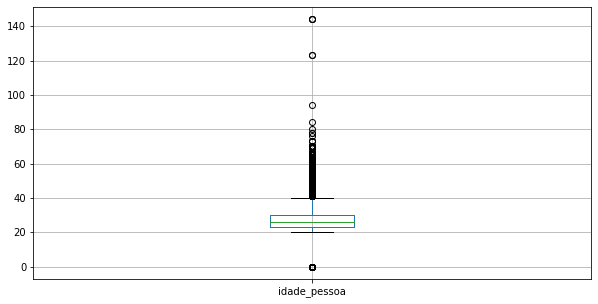

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
dados.boxplot(column = ['idade_pessoa'])

**OBS: Eu optei por não remover alguns dados que estão após o limite superior e abaixo ao limite inferior do boxplot, visando um modelo mais abrangente**

Pelo BoxPlot é possível notar uma grande quantidade de pessoas com idade = 0 e acima dos 85 anos já parecem estar muito longe dos dados comuns que temos. Visto isso, iremos tratar para não afetar nosso modelo

In [7]:
filtro = (dados.idade_pessoa > 18) & (dados.idade_pessoa < 85)

In [8]:
dados_sem_out = dados[filtro]

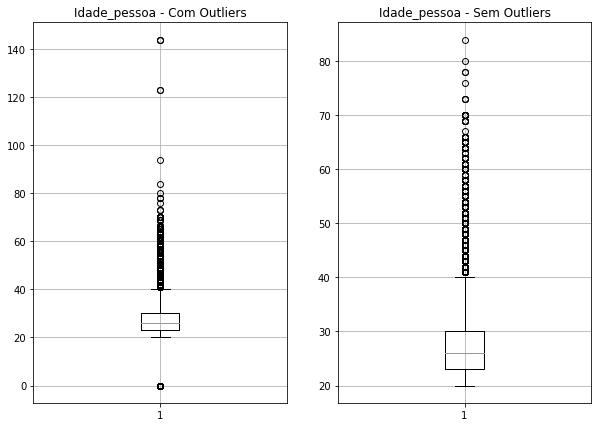

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10,7))
ax[1].set_title('Idade_pessoa - Sem Outliers')
ax[0].boxplot(dados.idade_pessoa)
ax[0].set_title('Idade_pessoa - Com Outliers')
ax[0].grid(True)
ax[1].boxplot(dados_sem_out.idade_pessoa)
ax[1].grid(True)

Agora ja temos uma melhora na dispersão de dados comparado com anteriormente

In [10]:
dados_sem_out.describe()

,idade_pessoa,salario_ano_pessoa,anos_trabalhados_pessoa,valor_emprestimo,taxa_juros_emprestimo,status_inadimplencia,percentual_emprestimo_salario,tempo_primeira_solicitacao
count,33146.000000,3.314600e+04,33146.000000,33146.000000,33146.000000,33146.000000,33146.000000,33146.000000
mean,27.716376,6.554003e+04,4.632746,9535.114343,9.902509,0.216678,0.169280,5.801092
std,6.201413,5.253935e+04,4.158681,6343.415706,4.516430,0.411987,0.107184,4.048721
min,20.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,3.840000e+04,2.000000,5000.000000,7.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.620000,0.000000,0.150000,4.000000
75%,30.000000,7.900000e+04,7.000000,12000.000000,13.110000,0.000000,0.230000,8.000000
max,84.000000,2.039784e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<AxesSubplot:>

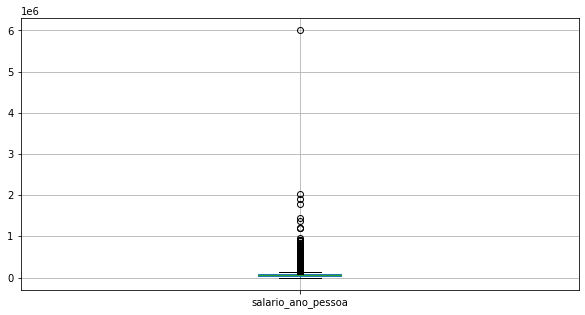

In [11]:
plt.figure(figsize=(10,5))
dados.boxplot(column = ['salario_ano_pessoa'])

Pode ser visto que acima de poucas pessoas posuem o salario acima dos 1 milhão anuais e pessoas que não ganham nenhum salário anual parece não fazer sentido para o que queremos. Iremos tratar isso:

In [12]:
filtro = (dados_sem_out.salario_ano_pessoa > 0) & (dados_sem_out.salario_ano_pessoa < 1000000)

In [13]:
dados_sem_out = dados_sem_out[filtro]

In [14]:
dados_sem_out.idade_pessoa.count()

32973

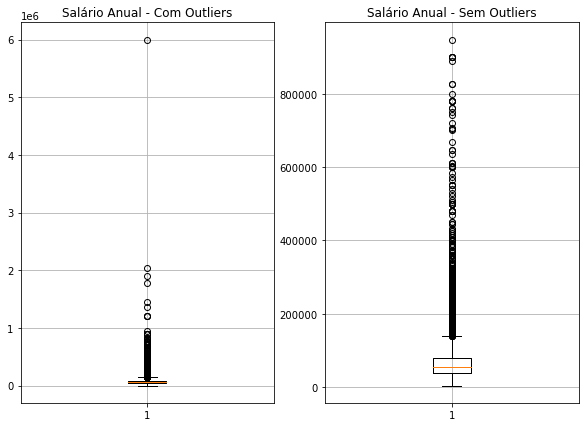

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10,7))
ax[0].boxplot(dados.salario_ano_pessoa)
ax[0].set_title('Salário Anual - Com Outliers')
ax[0].grid(True)
ax[1].boxplot(dados_sem_out.salario_ano_pessoa)
ax[1].set_title('Salário Anual - Sem Outliers')
ax[1].grid(True)

Veja que mesmo removendo os outliers claros ainda sim a variável dos salários anuais continua dispersa, porém vou optar por não exluir esses dados.

In [16]:
dados_sem_out.describe()

,idade_pessoa,salario_ano_pessoa,anos_trabalhados_pessoa,valor_emprestimo,taxa_juros_emprestimo,status_inadimplencia,percentual_emprestimo_salario,tempo_primeira_solicitacao
count,32973.000000,32973.000000,32973.000000,32973.000000,32973.000000,32973.000000,32973.000000,32973.000000
mean,27.713281,65516.216268,4.635763,9544.211173,9.912245,0.217147,0.169393,5.798441
std,6.192305,47099.566872,4.158444,6340.027808,4.507023,0.412310,0.107037,4.046236
min,20.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,38500.000000,2.000000,5000.000000,7.490000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.620000,0.000000,0.150000,4.000000
75%,30.000000,79200.000000,7.000000,12000.000000,13.110000,0.000000,0.230000,8.000000
max,84.000000,948000.000000,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<AxesSubplot:>

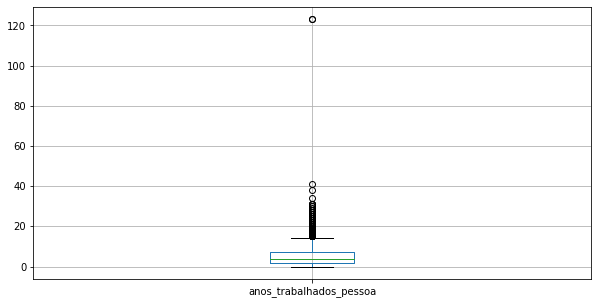

In [17]:
plt.figure(figsize=(10,5))
dados.boxplot(column = ['anos_trabalhados_pessoa'])

Vemos que temos um dado acima de 120 anos de trabalho, o que é impossível. Iremos remover esse dado.

In [18]:
filtro = dados_sem_out.anos_trabalhados_pessoa < 100
dados_sem_out = dados_sem_out[filtro]

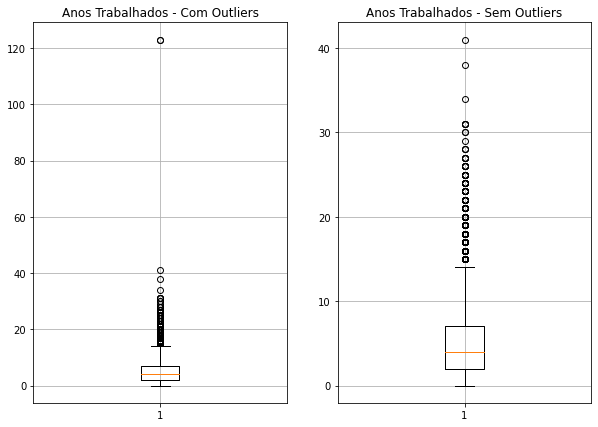

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10,7))
ax[0].boxplot(dados.anos_trabalhados_pessoa)
ax[0].set_title('Anos Trabalhados - Com Outliers')
ax[0].grid(True)
ax[1].boxplot(dados_sem_out.anos_trabalhados_pessoa)
ax[1].set_title('Anos Trabalhados - Sem Outliers')
ax[1].grid(True)

Ao contrario da variável anterior, essa se mostrou bem eficiente ao remover um dos outliers

In [20]:
dados_sem_out.describe()

,idade_pessoa,salario_ano_pessoa,anos_trabalhados_pessoa,valor_emprestimo,taxa_juros_emprestimo,status_inadimplencia,percentual_emprestimo_salario,tempo_primeira_solicitacao
count,32971.000000,32971.000000,32971.000000,32971.000000,32971.000000,32971.000000,32971.000000,32971.000000
mean,27.713657,65512.577689,4.628583,9543.121986,9.912162,0.217130,0.169382,5.798581
std,6.192302,47095.830324,4.055094,6338.408299,4.506996,0.412298,0.107014,4.046317
min,20.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,38500.000000,2.000000,5000.000000,7.490000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.620000,0.000000,0.150000,4.000000
75%,30.000000,79200.000000,7.000000,12000.000000,13.110000,0.000000,0.230000,8.000000
max,84.000000,948000.000000,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


O valor do emprestimo não pode ser igual a zero, logo iremos eliminar esses registros. Da mesma maneira a taxa de juros ser zero se tratando de um emprestimo parece ser também um outlier. Vamos tratar essas duas colunas

In [21]:
filtro = (dados_sem_out.valor_emprestimo > 0) & (dados_sem_out.taxa_juros_emprestimo > 0)
dados_sem_out = dados_sem_out[filtro]

Vamos analisar como ficou nossa base de dados depois de tratar esses outliers:

In [22]:
dados_sem_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29583 entries, 0 to 34484
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_pessoa                      29583 non-null  object 
 1   idade_pessoa                   29583 non-null  int64  
 2   salario_ano_pessoa             29583 non-null  int64  
 3   propriedade_pessoa             29583 non-null  object 
 4   anos_trabalhados_pessoa        29583 non-null  float64
 5   id_emprestimo                  29583 non-null  object 
 6   motivo_emprestimo              29583 non-null  object 
 7   pontuacao_emprestimo           29583 non-null  object 
 8   valor_emprestimo               29583 non-null  int64  
 9   taxa_juros_emprestimo          29583 non-null  float64
 10  status_inadimplencia           29583 non-null  int64  
 11  percentual_emprestimo_salario  29583 non-null  float64
 12  id_historico                   29583 non-null 

In [23]:
dados_sem_out.describe()

,idade_pessoa,salario_ano_pessoa,anos_trabalhados_pessoa,valor_emprestimo,taxa_juros_emprestimo,status_inadimplencia,percentual_emprestimo_salario,tempo_primeira_solicitacao
count,29583.000000,29583.000000,29583.000000,29583.000000,29583.000000,29583.000000,29583.000000,29583.000000
mean,27.699997,65525.552987,4.633911,9583.453335,11.010195,0.218808,0.169739,5.786938
std,6.168867,46921.136552,4.056791,6317.036143,3.239640,0.413445,0.107013,4.026903
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,38500.000000,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,79000.000000,7.000000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,84.000000,948000.000000,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


No final das contas, perdemos alguns registros da nossa base de dados, porém elas afetariam diretamente no nosso modelo, ou seja, remover esses outliers irá trazer mais vantagens do que desvantagens.

### 3. Correlação de Variáveis

<AxesSubplot:>

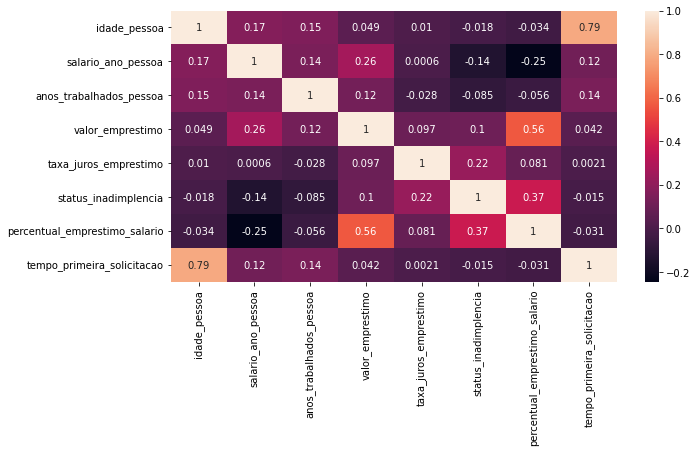

In [24]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(dados.corr(), annot = True)

Analise das correlações pelo mapa de calor:

• A base de dados não possui correlações muito forte entre as variáveis. Por esse motivo, não teremos aqui uma relação linear entre os dados.

### 4. Aplicação de encoding nas variáveis categóricas

In [25]:
dados_sem_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29583 entries, 0 to 34484
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_pessoa                      29583 non-null  object 
 1   idade_pessoa                   29583 non-null  int64  
 2   salario_ano_pessoa             29583 non-null  int64  
 3   propriedade_pessoa             29583 non-null  object 
 4   anos_trabalhados_pessoa        29583 non-null  float64
 5   id_emprestimo                  29583 non-null  object 
 6   motivo_emprestimo              29583 non-null  object 
 7   pontuacao_emprestimo           29583 non-null  object 
 8   valor_emprestimo               29583 non-null  int64  
 9   taxa_juros_emprestimo          29583 non-null  float64
 10  status_inadimplencia           29583 non-null  int64  
 11  percentual_emprestimo_salario  29583 non-null  float64
 12  id_historico                   29583 non-null 

As variáveis categóricas da base de dados são: 'propriedade_pessoa', 'motivo_emprestimo', 'pontuacao_emprestimo' e 'verifica_inadimplencia'. Vamos fazer o encoding dessas variáveis

In [26]:
dados_sem_out.propriedade_pessoa.unique()

array(['Aluguel', 'Hipoteca', 'Propria', 'Outros'], dtype=object)

In [27]:
dic = {
    'Aluguel': 1,
    'Hipoteca': 2,
    'Propria': 3,
    'Outros': 4
}
dados_sem_out.propriedade_pessoa = dados_sem_out.propriedade_pessoa.map(dic)

In [28]:
dados_sem_out.motivo_emprestimo.unique()

array(['Melhora_do_lar', 'Empreendimento', 'Pagamento_debitos', 'Pessoal',
       'Medico', 'Educativo'], dtype=object)

In [29]:
dic = {
    'Melhora_do_lar': 1,
    'Empreendimento': 2,
    'Pagamento_debitos': 3,
    'Pessoal': 4,
    'Medico': 5,
    'Educativo': 6
}
dados_sem_out.motivo_emprestimo = dados_sem_out.motivo_emprestimo.map(dic)

In [30]:
dados_sem_out.pontuacao_emprestimo.unique()

array(['A', 'C', 'D', 'E', 'B', 'F', 'G'], dtype=object)

In [31]:
dic = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7
}
dados_sem_out.pontuacao_emprestimo = dados_sem_out.pontuacao_emprestimo.map(dic)

In [32]:
dados_sem_out.verifica_inadimplencia.unique()

array(['N', 'Y'], dtype=object)

In [33]:
dic = {
    'N': 0,
    'Y': 1
}
dados_sem_out.verifica_inadimplencia = dados_sem_out.verifica_inadimplencia.map(dic)

### 5. Normalização das variáveis

Antes de fazer a normalização das variáveis precisamos separar as nossas colunas de variáveis categóricas por colunas com características dessas variáveis com valores binários. O motivo disso é que o modelo se adapta melhor dessa forma !

In [34]:
dados_sem_out = pd.get_dummies(dados_sem_out, columns = ['propriedade_pessoa', 'motivo_emprestimo', 'pontuacao_emprestimo'])

In [35]:
dados_sem_out.columns

Index(['id_pessoa', 'idade_pessoa', 'salario_ano_pessoa',
       'anos_trabalhados_pessoa', 'id_emprestimo', 'valor_emprestimo',
       'taxa_juros_emprestimo', 'status_inadimplencia',
       'percentual_emprestimo_salario', 'id_historico',
       'verifica_inadimplencia', 'tempo_primeira_solicitacao',
       'propriedade_pessoa_1', 'propriedade_pessoa_2', 'propriedade_pessoa_3',
       'propriedade_pessoa_4', 'motivo_emprestimo_1', 'motivo_emprestimo_2',
       'motivo_emprestimo_3', 'motivo_emprestimo_4', 'motivo_emprestimo_5',
       'motivo_emprestimo_6', 'pontuacao_emprestimo_1',
       'pontuacao_emprestimo_2', 'pontuacao_emprestimo_3',
       'pontuacao_emprestimo_4', 'pontuacao_emprestimo_5',
       'pontuacao_emprestimo_6', 'pontuacao_emprestimo_7'],
      dtype='object')

Existe mais um passo a se fazer antes de normalizar as variáveis, pois só queremos normalizar as variáveis de entrada (X). Logo, precisamos remover as colunas que só servem para identificação como a coluna 'id_pessoa' e a coluna que representa nossa saída (Y).

In [36]:
x = dados_sem_out.drop(columns = ['id_pessoa', 'id_emprestimo', 'status_inadimplencia', 'id_historico'])
y = dados_sem_out['status_inadimplencia']

In [37]:
x.columns

Index(['idade_pessoa', 'salario_ano_pessoa', 'anos_trabalhados_pessoa',
       'valor_emprestimo', 'taxa_juros_emprestimo',
       'percentual_emprestimo_salario', 'verifica_inadimplencia',
       'tempo_primeira_solicitacao', 'propriedade_pessoa_1',
       'propriedade_pessoa_2', 'propriedade_pessoa_3', 'propriedade_pessoa_4',
       'motivo_emprestimo_1', 'motivo_emprestimo_2', 'motivo_emprestimo_3',
       'motivo_emprestimo_4', 'motivo_emprestimo_5', 'motivo_emprestimo_6',
       'pontuacao_emprestimo_1', 'pontuacao_emprestimo_2',
       'pontuacao_emprestimo_3', 'pontuacao_emprestimo_4',
       'pontuacao_emprestimo_5', 'pontuacao_emprestimo_6',
       'pontuacao_emprestimo_7'],
      dtype='object')

In [38]:
y

0        0
1        1
2        0
4        1
5        0
        ..
34479    1
34480    0
34481    0
34482    1
34484    0
Name: status_inadimplencia, Length: 29583, dtype: int64

Agora sim é hora de fazer a normalização das variáveis a serem treinadas !

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scale = scaler.fit_transform(x)
x_scale = pd.DataFrame(x_scale, columns = x.columns)
x_scale.head(5)

,idade_pessoa,salario_ano_pessoa,anos_trabalhados_pessoa,valor_emprestimo,taxa_juros_emprestimo,percentual_emprestimo_salario,verifica_inadimplencia,tempo_primeira_solicitacao,propriedade_pessoa_1,propriedade_pessoa_2,...,motivo_emprestimo_4,motivo_emprestimo_5,motivo_emprestimo_6,pontuacao_emprestimo_1,pontuacao_emprestimo_2,pontuacao_emprestimo_3,pontuacao_emprestimo_4,pontuacao_emprestimo_5,pontuacao_emprestimo_6,pontuacao_emprestimo_7
0,-0.113474,0.052737,-0.156262,-0.139855,-0.966233,-0.371352,-0.463420,-0.195424,0.989408,-0.835888,...,-0.452347,-0.476607,-0.498278,1.418851,-0.6841,-0.496321,-0.355969,-0.175711,-0.085562,-0.044703
1,-0.599796,-1.127987,-0.649271,-1.121344,0.648171,0.282787,2.157871,-0.940426,0.989408,-0.835888,...,-0.452347,-0.476607,-0.498278,-0.704795,-0.6841,2.014824,-0.355969,-0.175711,-0.085562,-0.044703
2,0.372847,0.734744,2.062278,0.382551,-0.966233,-0.464801,-0.463420,0.797912,0.989408,-0.835888,...,-0.452347,-0.476607,-0.498278,1.418851,-0.6841,-0.496321,-0.355969,-0.175711,-0.085562,-0.044703
3,0.372847,0.956396,-0.895775,0.699160,1.814987,-0.371352,-0.463420,0.052910,0.989408,-0.835888,...,-0.452347,-0.476607,-0.498278,-0.704795,-0.6841,-0.496321,2.809234,-0.175711,-0.085562,-0.044703
4,0.534954,-0.821340,-1.142280,-0.598939,-1.355172,0.376236,-0.463420,0.797912,0.989408,-0.835888,...,-0.452347,-0.476607,-0.498278,1.418851,-0.6841,-0.496321,-0.355969,-0.175711,-0.085562,-0.044703


### 6. Balanceamento na variável alvo

Primeiramente vamos ver se nossa variável alvo (O que queremos prever) está balanceada ou não:

In [40]:
print('Nº de pessoas que não são inadimplentes: ', y.value_counts()[0])
print('Nº de pessoas que são inadimplentes: ', y.value_counts()[1])

Nº de pessoas que não são inadimplentes:  23110
Nº de pessoas que são inadimplentes:  6473


É notório que os nossos dados tem muito mais pessoas que não são inadimplentes (0) do que pessoas que são inadimplentes (1). Se treinarmos o modelo dessa forma, ele pode se acostumar muito com os dados de treino e escolher que chutar todas as respostas como 'não inadimplente' seja uma boa escolha. E de fato, observe: 
    


In [41]:
print('Chute todos como não inadimplentes: {}%'.format(y.value_counts()[0]/(y.value_counts()[1]+y.value_counts()[0]) * 100))

Chute todos como não inadimplentes: 78.11919007538113%


Se o modelo chuta todos como não inadimplentes, vamos ter 78% de acurácia no nosso modelo. Mas não é isso que queremos. Queremos que além de uma boa acurácia o modelo seja benéfico para a Alura Cash.

Por isso, vamos utilizar a técnica de OverSampling que consiste em aumentar a quantidade de registros da classe com menor frequência até que a base de dados possua uma quantidade equilibrada entre as classes da variável alvo.

In [42]:
from imblearn.over_sampling import SMOTE

seed = 25
oversample = SMOTE(random_state = seed)
x_scale, y = oversample.fit_resample(x_scale,y)

In [43]:
print('Nº de pessoas que não são inadimplentes: ', y.value_counts()[0])
print('Nº de pessoas que são inadimplentes: ', y.value_counts()[1])

Nº de pessoas que não são inadimplentes:  23110
Nº de pessoas que são inadimplentes:  23110


Como visto acima agora temos nossa variável alvo balanceada, chegou finalmente de elaborar o modelo de Machine Learning.

### 7. Criação do Modelo de ML

>**7.1. Regressão Logística**

Dividindo os dados de treino e dados de teste:

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size = 0.3, random_state = seed, stratify = y)

In [45]:
print('Tamanho da amostra total: ', x_scale.shape[0])
print('Tamanho da amostra de treino: ', x_train.shape[0])
print('Tamanho da amostra de treino: ', x_test.shape[0])

Tamanho da amostra total:  46220
Tamanho da amostra de treino:  32354
Tamanho da amostra de treino:  13866


Aplicando o modelo e obtendo métricas:

O Score foi de 80.2%
A Acurácia foi de 79.7%
A Taxa de Recall foi de 77.0%
A Taxa de Balanceamendo (F1-score) foi de 79.10000000000001%
Roc_auc score foi de 0.874


C:\Users\mvsam\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


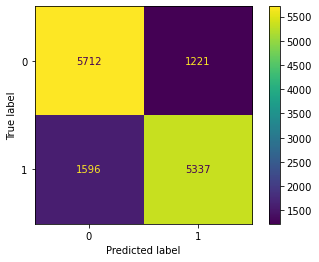

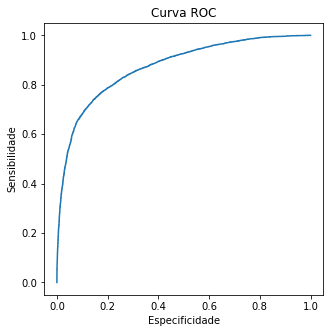

In [46]:
# Importação de bibliotecas:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# Modelo e previsões:

modelo = LogisticRegression(max_iter=1000, random_state = seed)
modelo.fit(x_train, y_train)

previsoes = modelo.predict(x_test)

# Metricas:

score_1 = round(modelo.score(x_train, y_train),3) * 100

acuracia_1 = round(accuracy_score(y_test, previsoes),3) * 100

recall_1 = round(recall_score(y_test, previsoes),3)*100

f1_1 = round(f1_score(y_test, previsoes),3)*100

print('O Score foi de {}%'.format(score_1))
print('A Acurácia foi de {}%'.format(acuracia_1))
print('A Taxa de Recall foi de {}%'.format(recall_1))
print('A Taxa de Balanceamendo (F1-score) foi de {}%'.format(f1_1))

matriz_confusao = plot_confusion_matrix(modelo, x_test, y_test)
matriz_confusao

# Plot da Curva ROC:

prob_previsao = modelo.predict_proba(x_test)[:,1]

# tfp = Taxa Falsos Positivos
# tvp = Taxa Verdadeiros Positivos

tfp, tvp, limite = roc_curve(y_test, prob_previsao)
print('Roc_auc score foi de {}'.format(round(roc_auc_score(y_test, prob_previsao),3)))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp, tvp)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.show()

>**7.2. Decision Tree**

O Score foi de 87.5%
A Acurácia foi de 85.8%
A Taxa de Recall foi de 74.3%
A Taxa de Balanceamendo (F1-score) foi de 83.89999999999999%
roc_auc 0.9261234162536813


C:\Users\mvsam\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


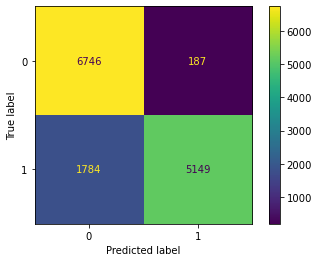

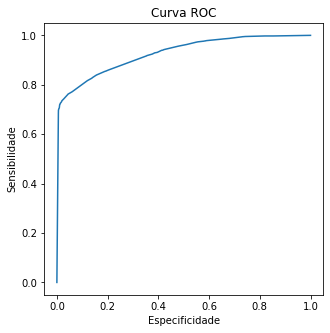

In [47]:
# Importação de bibliotecas:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# Modelo e previsões:

modelo = DecisionTreeClassifier(random_state = seed, max_depth=10)
modelo.fit(x_train, y_train)

previsoes = modelo.predict(x_test)

# Metricas:

score_2 = round(modelo.score(x_train, y_train),3) * 100

acuracia_2 = round(accuracy_score(y_test, previsoes),3) * 100

recall_2 = round(recall_score(y_test, previsoes),3)*100

f1_2 = round(f1_score(y_test, previsoes),3)*100

print('O Score foi de {}%'.format(score_2))
print('A Acurácia foi de {}%'.format(acuracia_2))
print('A Taxa de Recall foi de {}%'.format(recall_2))
print('A Taxa de Balanceamendo (F1-score) foi de {}%'.format(f1_2))

matriz_confusao = plot_confusion_matrix(modelo, x_test, y_test)
matriz_confusao

# Plot da Curva ROC:

prob_previsao = modelo.predict_proba(x_test)[:,1]

# tfp = Taxa Falsos Positivos
# tvp = Taxa Verdadeiros Positivos

tfp, tvp, limite = roc_curve(y_test, prob_previsao)
print('roc_auc', roc_auc_score(y_test, prob_previsao))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp, tvp)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.show()

>**7.3. Random Forest**

O Score foi de 89.0%
A Acurácia foi de 86.6%
A Taxa de Recall foi de 77.9%
A Taxa de Balanceamendo (F1-score) foi de 85.3%


C:\Users\mvsam\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


roc_auc 0.9482110499063079


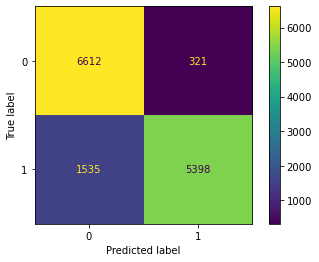

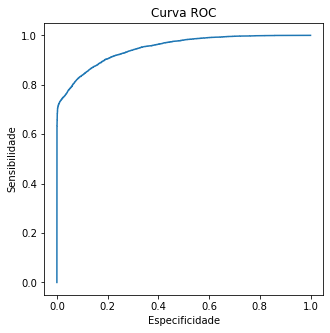

In [48]:
# Importação de bibliotecas:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# Modelo e previsões:

modelo = RandomForestClassifier(random_state = seed, max_depth = 10)
modelo.fit(x_train, y_train)

previsoes = modelo.predict(x_test)

# Metricas:

score_3 = round(modelo.score(x_train, y_train),3) * 100

acuracia_3 = round(accuracy_score(y_test, previsoes),3) * 100

recall_3 = round(recall_score(y_test, previsoes),3)*100

f1_3 = round(f1_score(y_test, previsoes),3)*100

print('O Score foi de {}%'.format(score_3))
print('A Acurácia foi de {}%'.format(acuracia_3))
print('A Taxa de Recall foi de {}%'.format(recall_3))
print('A Taxa de Balanceamendo (F1-score) foi de {}%'.format(f1_3))

matriz_confusao = plot_confusion_matrix(modelo, x_test, y_test)
matriz_confusao

# Plot da Curva ROC:

prob_previsao = modelo.predict_proba(x_test)[:,1]

# tfp = Taxa Falsos Positivos
# tvp = Taxa Verdadeiros Positivos

tfp, tvp, limite = roc_curve(y_test, prob_previsao)
print('roc_auc', roc_auc_score(y_test, prob_previsao))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp, tvp)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.show()

### 8. Avaliação dos Modelos de ML

Após a criação dos modelos da etapa anterior e a avaliação das métricas, eu escolhi por optar pelo modelo **Random Forest**, pois é um modelo que consegue generalizar bem e se adaptar melhor para essa aplicação de Credit Scoring. Abaixo fiz um resumo gráfico de todas as métricas resumindo a eficiência do Random Forest.

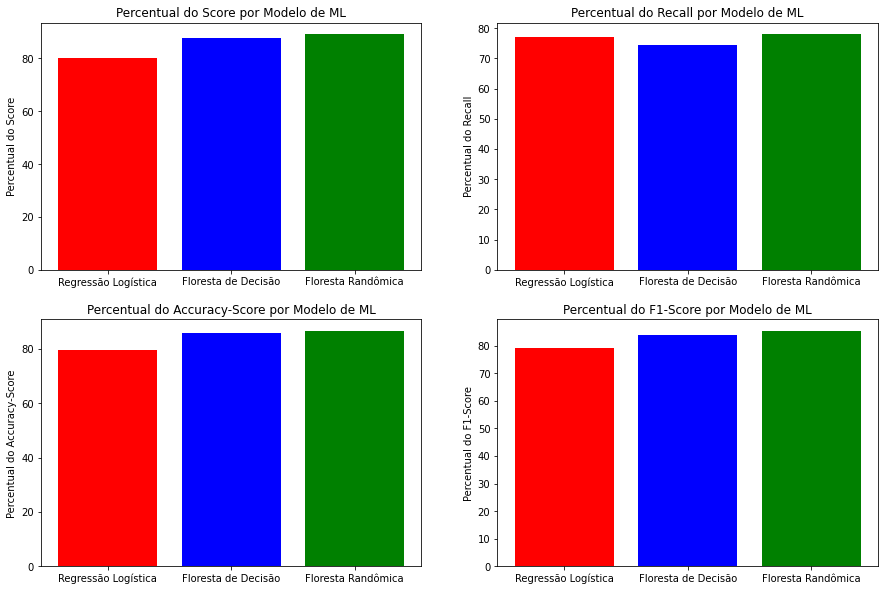

In [49]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2,2)
fig.set_size_inches(15,10)
modelos = ['Regressão Logística', 'Floresta de Decisão', 'Floresta Randômica']
bar_labels = ['red', 'blue', 'green']

counts = [score_1,score_2,score_3]
axs[0][0].bar(modelos, counts, color=bar_labels)
axs[0][0].set_ylabel('Percentual do Score')
axs[0][0].set_title('Percentual do Score por Modelo de ML')

counts = [acuracia_1,acuracia_2,acuracia_3]
axs[1][0].bar(modelos, counts, color=bar_labels)
axs[1][0].set_ylabel('Percentual do Accuracy-Score')
axs[1][0].set_title('Percentual do Accuracy-Score por Modelo de ML')

counts = [recall_1,recall_2,recall_3]
axs[0][1].bar(modelos, counts, color=bar_labels)
axs[0][1].set_ylabel('Percentual do Recall')
axs[0][1].set_title('Percentual do Recall por Modelo de ML')

counts = [f1_1,f1_2,f1_3]
axs[1][1].bar(modelos, counts, color=bar_labels)
axs[1][1].set_ylabel('Percentual do F1-Score')
axs[1][1].set_title('Percentual do F1-Score por Modelo de ML')

plt.show()